In [1]:
## how I set up this conda environment
## create a new conda environment
#conda create -n rootstuff python=3.8
#conda activate rootstuff
#conda install jupyter


## install the necessary python packages
#pip install numpy pandas scikit-learn scipy matplotlib tqdm PyYAML

## install uproot for reading/writing ROOT files
#pip install uproot awkward

#jupyter notebook

#the file generation is detailed on the 9/8 update slide 16 here:
#https://docs.google.com/presentation/d/1qoWWkXETPMWIC__PAp40XhWTxzAKhCB8VJncFzQOSpw/edit?usp=sharing

#following artur's GREAT instructions here: https://cms-adl1-workspace.slack.com/archives/C044DCJ4Z5K/p1693493563332399

In [2]:
#imports
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load file (assuming in the current repository)
fname = "./L1Ntuple.root"
f = uproot.open(fname)
f.keys()

['l1EventTree;1',
 'l1EventTree/L1EventTree;1',
 'l1CaloTowerTree;1',
 'l1CaloTowerTree/L1CaloTowerTree;1',
 'l1UpgradeTfMuonTree;1',
 'l1UpgradeTfMuonTree/L1UpgradeTfMuonTree;1',
 'l1UpgradeTfMuonShowerTree;1',
 'l1UpgradeTfMuonShowerTree/L1UpgradeTfMuonShowerTree;1',
 'l1UpgradeTree;1',
 'l1UpgradeTree/L1UpgradeTree;1',
 'l1uGTTree;1',
 'l1uGTTree/L1uGTTree;1',
 'l1uGTTestcrateTree;1',
 'l1uGTTestcrateTree/L1uGTTree;1',
 'l1HOTree;1',
 'l1HOTree/L1HOTree;1',
 'l1UpgradeTfMuonEmuTree;1',
 'l1UpgradeTfMuonEmuTree/L1UpgradeTfMuonTree;1',
 'l1CaloTowerEmuTree;1',
 'l1CaloTowerEmuTree/L1CaloTowerTree;1',
 'l1UpgradeEmuTree;1',
 'l1UpgradeEmuTree/L1UpgradeTree;1',
 'l1uGTEmuTree;1',
 'l1uGTEmuTree/L1uGTTree;1']

In [4]:
a_uGT_test = f["l1uGTTestcrateTree/L1uGTTree"].arrays()
decision = a_uGT_test.m_algoDecisionInitial
decision = ak.to_numpy(decision)
decision.shape #-> this is (Nevents, 512) for 512 trigger bits of the uGT

a_uGT_emu = f["l1uGTEmuTree/L1uGTTree"].arrays()
emudecision = a_uGT_emu.m_algoDecisionInitial
emudecision = ak.to_numpy(emudecision)
emudecision.shape #-> this is (Nevents, 512) for 512 trigger bits of the uGT

(1811, 512)

In [5]:
#map adt names to the bits
#not sure how Artur knew what bits to use
adt_trig_bits = {'L1_ADT_20000': 94, 'L1_ADT_4000': 95, 'L1_ADT_400': 103, 'L1_ADT_80': 108}

In [6]:
#count how many times bit fired in the total number of events
ntrues =  {'L1_ADT_20000': 0, 'L1_ADT_4000': 0, 'L1_ADT_400': 0, 'L1_ADT_80': 0, 'TOTAL':0}
ntrues['TOTAL']=len(decision)

ntruesemu =  {'L1_ADT_20000': 0, 'L1_ADT_4000': 0, 'L1_ADT_400': 0, 'L1_ADT_80': 0, 'TOTAL':0}
ntruesemu['TOTAL']=len(decision)

print("Total N events Test Crate: %i" %len(decision))
for trig,bit in adt_trig_bits.items():
    print(trig, sum(decision[:,bit]))
    ntrues[trig] = sum(decision[:,bit])

print("Total N events Emulator: %i" %len(emudecision))
for trig,bit in adt_trig_bits.items():
    print(trig, sum(emudecision[:,bit]))
    ntruesemu[trig] = sum(emudecision[:,bit])
    
print(ntrues)
print(ntruesemu)

Total N events Test Crate: 1811
L1_ADT_20000 0
L1_ADT_4000 172
L1_ADT_400 1602
L1_ADT_80 1794
Total N events Emulator: 1811
L1_ADT_20000 0
L1_ADT_4000 146
L1_ADT_400 1613
L1_ADT_80 1793
{'L1_ADT_20000': 0, 'L1_ADT_4000': 172, 'L1_ADT_400': 1602, 'L1_ADT_80': 1794, 'TOTAL': 1811}
{'L1_ADT_20000': 0, 'L1_ADT_4000': 146, 'L1_ADT_400': 1613, 'L1_ADT_80': 1793, 'TOTAL': 1811}


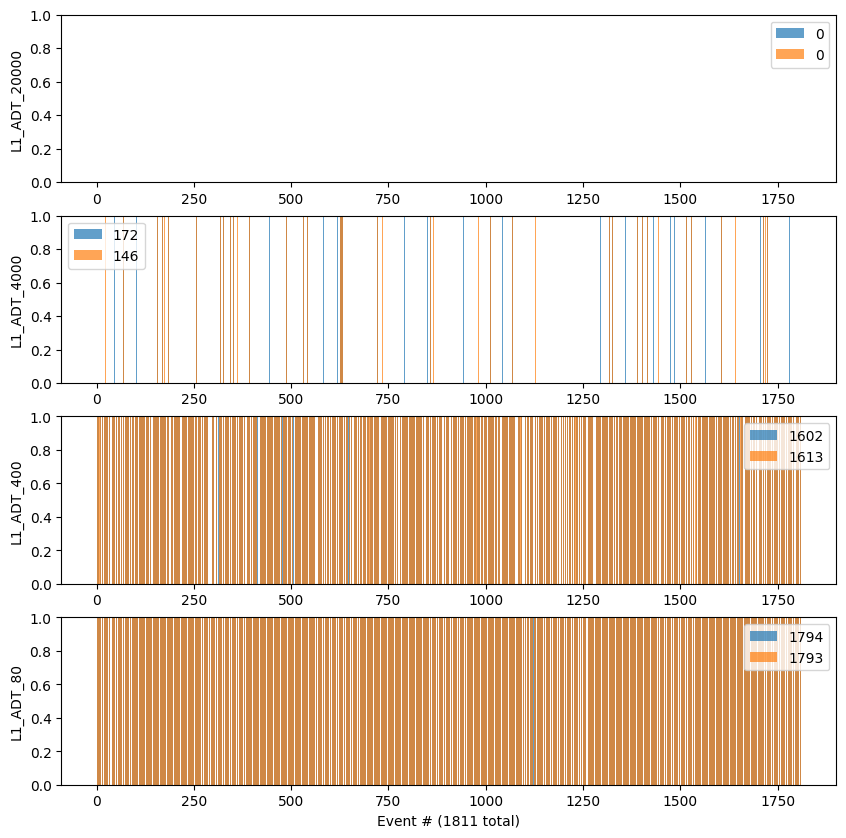

In [7]:
#can we plot what events these fired at?
#here are my arrays
L1_ADT_20000 = decision[:,94]
L1_ADT_4000 = decision[:,95]
L1_ADT_400 = decision[:,103]
L1_ADT_80 = decision[:,108]

L1emu_ADT_20000 = emudecision[:,94]
L1emu_ADT_4000 = emudecision[:,95]
L1emu_ADT_400 = emudecision[:,103]
L1emu_ADT_80 = emudecision[:,108]

#create x axis values for every event
indices = np.arange(len(decision))

# Create a grid of subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# Create a bar plot to compare the arrays
#plt.figure(figsize=(10, 6))  # Adjust the figure size as needed 
#for one plot use plt. for 4 use axs[1]
axs[0].bar(indices, L1_ADT_20000, label=ntrues['L1_ADT_20000'], alpha=0.7)
axs[0].bar(indices, L1emu_ADT_20000, label=ntruesemu['L1_ADT_20000'], alpha=0.7)
axs[1].bar(indices, L1_ADT_4000, label=ntrues['L1_ADT_4000'], alpha=0.7)
axs[1].bar(indices, L1emu_ADT_4000, label=ntruesemu['L1_ADT_4000'], alpha=0.7)
axs[2].bar(indices, L1_ADT_400, label=ntrues['L1_ADT_400'], alpha=0.7)
axs[2].bar(indices, L1emu_ADT_400, label=ntruesemu['L1_ADT_400'], alpha=0.7)
axs[3].bar(indices, L1_ADT_80, label=ntrues['L1_ADT_80'], alpha=0.7)
axs[3].bar(indices, L1emu_ADT_80, label=ntruesemu['L1_ADT_80'], alpha=0.7)

# Customize the plot (add labels, legend, etc. as needed)
plt.xlabel('Event # ('+str(ntrues['TOTAL'])+' total)')
ynames = ['L1_ADT_20000', 'L1_ADT_4000', 'L1_ADT_400', 'L1_ADT_80']
for ax,yn in zip(axs.flat, ynames):
    ax.set_ylabel(yn)
    ax.set_ylim(0, 1)
    ax.legend()

# Show the plot
plt.show()

In [8]:
#comparing with firmware
#can compare two numpy arrays to see what values dont match
comp20000 = L1_ADT_20000 == L1emu_ADT_20000
comp4000  = L1_ADT_4000 == L1emu_ADT_4000
comp400   = L1_ADT_400 == L1emu_ADT_400
comp80    = L1_ADT_80 == L1emu_ADT_80

nmatch =  {'L1_ADT_20000': 0, 'L1_ADT_4000': 0, 'L1_ADT_400': 0, 'L1_ADT_80': 0}

nmatch['L1_ADT_20000'] = sum(comp20000[:])
nmatch['L1_ADT_4000'] = sum(comp4000[:])
nmatch['L1_ADT_400'] = sum(comp400[:])
nmatch['L1_ADT_80'] = sum(comp80[:])

for i,trig in enumerate(nmatch.keys()):
    print("Trigger: %s" %trig)
    print("N events Test Crate/Emulator: %i / %i" % (ntrues[trig],ntruesemu[trig]))
    print("Events with SAME trigger: %i" %nmatch[trig])
    print("Events with DIFFERENT trigger: %i \n" %(len(decision)-nmatch[trig]))


Trigger: L1_ADT_20000
N events Test Crate/Emulator: 0 / 0
Events with SAME trigger: 1811
Events with DIFFERENT trigger: 0 

Trigger: L1_ADT_4000
N events Test Crate/Emulator: 172 / 146
Events with SAME trigger: 1725
Events with DIFFERENT trigger: 86 

Trigger: L1_ADT_400
N events Test Crate/Emulator: 1602 / 1613
Events with SAME trigger: 1756
Events with DIFFERENT trigger: 55 

Trigger: L1_ADT_80
N events Test Crate/Emulator: 1794 / 1793
Events with SAME trigger: 1806
Events with DIFFERENT trigger: 5 



In [9]:
#can make new arrays that are the inverse of comp arrays, so arrays of all the values that DO NOT match
ncomp20000 = ~comp20000
ncomp4000 = ~comp4000
ncomp400 = ~comp400
ncomp80 = ~comp80

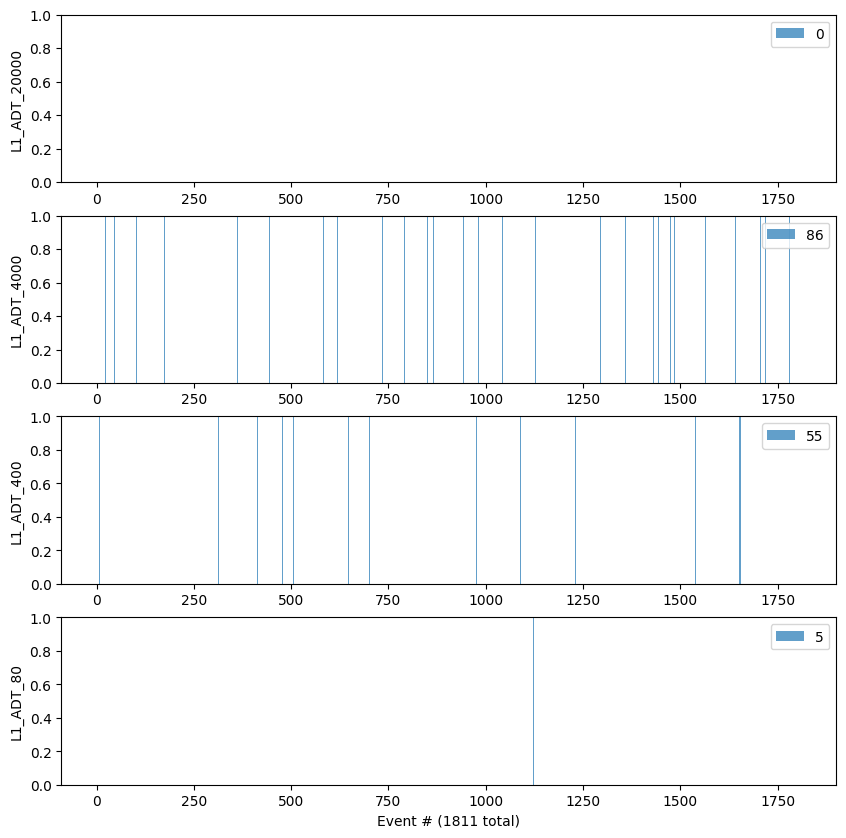

In [10]:
#can then plot these (events with DIFFERENT trigger)
# Create a grid of subplots
fig2, axs2 = plt.subplots(4, 1, figsize=(10, 10))

(len(decision)-nmatch['L1_ADT_20000'])
# Create a bar plot to compare the arrays
#plt.figure(figsize=(10, 6))  # Adjust the figure size as needed 
#for one plot use plt. for 4 use axs[1]
axs2[0].bar(indices, ncomp20000, label=(len(decision)-nmatch['L1_ADT_20000']), alpha=0.7)
axs2[1].bar(indices, ncomp4000, label=(len(decision)-nmatch['L1_ADT_4000']), alpha=0.7)
axs2[2].bar(indices, ncomp400, label=(len(decision)-nmatch['L1_ADT_400']), alpha=0.7)
axs2[3].bar(indices, ncomp80, label=(len(decision)-nmatch['L1_ADT_80']), alpha=0.7)

# Customize the plot (add labels, legend, etc. as needed)
plt.xlabel('Event # ('+str(ntrues['TOTAL'])+' total)')
ynames = ['L1_ADT_20000', 'L1_ADT_4000', 'L1_ADT_400', 'L1_ADT_80']
for ax,yn in zip(axs2.flat, ynames):
    ax.set_ylabel(yn)
    ax.set_ylim(0, 1)
    ax.legend()

# Show the plot
plt.show()
